# Bias-Variance Tradeoff - Lab

## Introduction

In this lab, you'll practice the concepts you learned in the last lesson, bias-variance tradeoff. 

## Objectives

In this lab you will: 

- Demonstrate the tradeoff between bias and variance by way of fitting a machine learning model 

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year. Start by running the following cell which imports all the necessary functions and the dataset: 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


Subset the `df` DataFrame to only keep the `'domgross'`, `'budget'`, `'imdbRating'`, `'Metascore'`, and `'imdbVotes'` columns. 

In [2]:
# Subset the DataFrame
df = df[["domgross","budget","imdbRating","Metascore","imdbVotes"]]
df.head()

,domgross,budget,imdbRating,Metascore,imdbVotes
0,25682380,13000000,6.8,48,206513
1,13414714,45658735,0.0,0,0
2,53107035,20000000,8.1,96,537525
3,75612460,61000000,6.7,55,173726
4,95020213,40000000,7.5,62,74170


## Split the data


- First, assign the predictors to `X` and the outcome variable, `'domgross'` to `y` 
- Split the data into training and test sets. Set the seed to 42 and the `test_size` to 0.25 

In [4]:
# domgross is the outcome variable
X = df[["budget","imdbRating","Metascore","imdbVotes"]]
y = df["domgross"]

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [5]:
# create a scaler
scaler = MinMaxScaler()

Use the `MinMaxScaler` to scale the training set. Remember you can fit and transform in a single method using `.fit_transform()`.  

Then, use `.transform()` to apply the scaler to the test set.

In [6]:
# fit and transform X_train
# X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)

# transform X_test
X_test_scaled = scaler.fit_transform(X_test)

## Fit a regression model to the training data

In [51]:
# Your code 

# create an instance of linear regression
linreg = LinearRegression()

# fit the model to X_train and y_train
linreg_model = linreg.fit(X_train,y_train)

Use the model to make predictions on both the training and test sets: 

In [52]:
# Training set predictions
lm_train_predictions = linreg_model.predict(X_train)

# Test set predictions 
lm_test_predictions = linreg_model.predict(X_test)

Plot predictions for the training set against the actual data: 

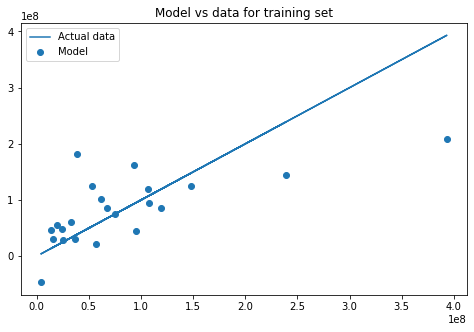

In [53]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

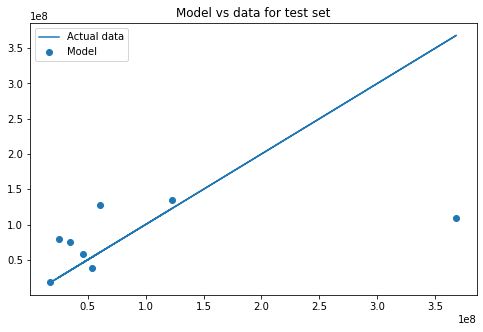

In [54]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

## Bias

Create a function `bias()` to calculate the bias of a model's predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  

In [75]:
import numpy as np
def bias(y, y_hat):
    bias = np.mean(y_hat - y)
    return bias



## Variance
Create a function `variance()` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [17]:
def variance(y_hat):
    variance = np.mean((y_hat - np.mean(y_hat))**2)
    return variance

## Calculate bias and variance

In [97]:
# Bias and variance for training set 
b = bias(y_train,lm_train_predictions)
v = variance(lm_train_predictions)
print(f'Train bias: {b} \nTrain variance: {v}')

# Train bias (approximate): -4.063953052867542e-09 
# Train variance (approximate): 3406811040986517.0

Train bias: 1.3546510176225142e-09 
Train variance: 3406811040980158.0


In [77]:
# Bias and variance for test set 
b = bias(y_test, lm_test_predictions)
v = variance(lm_test_predictions)
print(f'Test bias: {b} \nTest variance: {v}')

# Test bias: -10982393.918069275 
# Test variance: 1518678846127932.0

Test bias: -10982393.918056073 
Test variance: 1518678846122639.5


## Overfit a new model 

Use `PolynomialFeatures` with degree 3 and transform `X_train_scaled` and `X_test_scaled`. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

*Budget* times *MetaScore* squared

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape()`! 


In [83]:
# Your code here
poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [81]:
# Check the shape
np.shape(X_train_poly)
np.shape(X_test_poly)

(8, 35)

Fit a regression model to the training data: 

In [80]:
# Your code here
polyreg = LinearRegression()
polynomial_model = polyreg.fit(X_train_poly,y_train)

Use the model to make predictions on both the training and test sets: 

In [93]:
# Training set predictions
poly_train_predictions = polynomial_model.predict(X_train_poly)

# Test set predictions 
poly_test_predictions = polynomial_model.predict(X_test_poly)

Plot predictions for the training set against the actual data: 

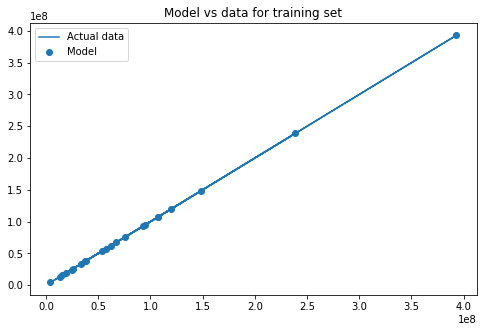

In [87]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, poly_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

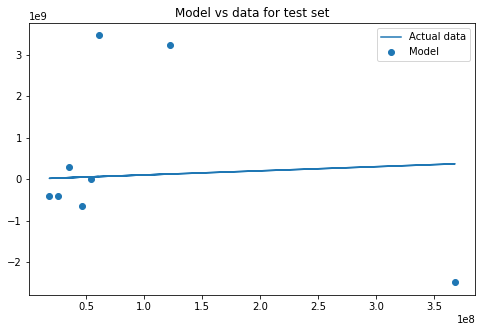

In [88]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, poly_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

Calculate the bias and variance for the training set: 

In [89]:
# Bias and variance for training set 
b = bias(y_train, poly_train_predictions)
v = variance(poly_train_predictions)
print('Train bias: {} \nTrain variance: {}'.format(b, v))

# Train bias (approximate): -2.0997090773148971e-07
# Train variance (approximate): 7394168636697528.0

Train bias: -8.188865401528098e-07 
Train variance: 7394168636697568.0


In [91]:
 poly_train_predictions

array([1.94521380e+07, 2.56823800e+07, 9.50202130e+07, 1.19640264e+08,
       3.83624750e+07, 3.33458330e+07, 3.73048740e+07, 5.70129770e+07,
       1.34147140e+07, 5.31070350e+07, 2.38679850e+08, 7.56124600e+07,
       1.07518682e+08, 3.93050114e+08, 2.44777040e+07, 4.16749300e+06,
       6.17371910e+07, 1.53239210e+07, 1.48430908e+08, 1.07136417e+08,
       9.30501170e+07, 6.73491980e+07])

Calculate the bias and variance for the test set: 

In [90]:
# Bias and variance for test set 
b = bias(y_test,poly_test_predictions) 
v = variance(poly_test_predictions) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

# Test bias: -68166032.47666144 
# Test variance: 4.798244829435879e+16

Test bias: 286956509.23892885 
Test variance: 3.5663821938914826e+18


## Interpret the overfit model

In [ ]:
# Your description here

"""Model performs well on the training data but fails on test data as the train bias is lower than the test bias. This
indicates model complexity which shows that the model is able to pick up on the training data effectively. However, the model
is sensitive to changes especially when introduced to new data as can be seen by the high variance in the train data
and more prominent in the test data set. """

## Level Up (Optional)

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by adding just a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using both simple and complex models. 